## Intrinsic dimension estimatation to encoder
### Social data

In [47]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
def run_pca(df : pd.DataFrame,kept_variance:int=0.99,standardize=True):

    if standardize:
        scaler = StandardScaler()
        standardized = scaler.fit_transform(df)
    else:
        standardized = df
    pca = PCA(n_components=kept_variance)
    pca.fit(standardized)
    return pca

In [49]:
import pandas as pd
from os.path import dirname, abspath
socials = pd.read_csv('../cryptoCompareData/btc_social.csv')
socials = socials.filter(regex='reddit')
first_non_zero = socials.eq(0).idxmin().min()
socials = socials.loc[first_non_zero:].reset_index(drop=True)
socials.head(5)

,reddit_subscribers,reddit_active_users,reddit_posts_per_hour,reddit_posts_per_day,reddit_comments_per_hour,reddit_comments_per_day
0,230517,4748,23.10,554.38,351.56,8437.50
1,231470,15977,13.78,330.62,172.08,4130.02
2,232185,3070,14.01,336.20,138.09,3314.15
3,232777,3448,15.27,366.41,267.86,6428.57
4,233336,4480,18.80,451.25,278.21,6676.97


<AxesSubplot:>

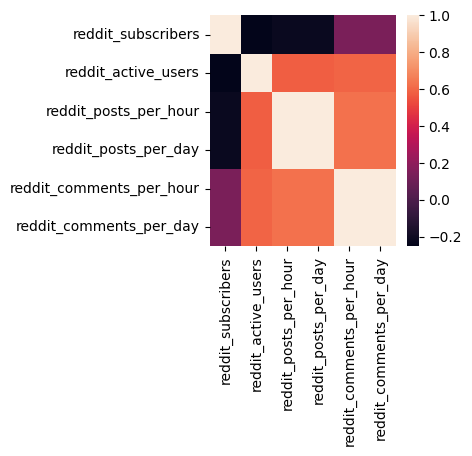

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = socials.corr()
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        ax=ax)

In [46]:
pca = run_pca(socials,kept_variance=0.99)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.62574215 0.21356001 0.10094112 0.05975669]
0.9999999727070086


###### 4-5 neurons for social encodings as latent space should be enough

### blockchain data

In [61]:
chain = pd.read_csv('../cryptoCompareData/btc_blockchain_data.csv')
all_time_cols = chain.filter(regex='all_time').columns.tolist()
chain.drop(columns=all_time_cols+['time'],inplace=True)
chain.head(5)

,new_addresses,active_addresses,transaction_count,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
0,1,1,1,0,50.0,0,0.0,1.0,0.0,285,50.0
1,0,0,0,0,0.0,0,0.0,0.0,0.0,0,50.0
2,0,0,0,0,0.0,0,0.0,0.0,0.0,0,50.0
3,0,0,0,0,0.0,0,0.0,0.0,0.0,0,50.0
4,0,0,0,0,0.0,0,0.0,0.0,0.0,0,50.0


In [64]:
pca=run_pca(chain,kept_variance=0.999)
pca.explained_variance_ratio_

array([0.70502286, 0.09752006, 0.08950042, 0.05877653, 0.02966561,
       0.01264014, 0.00325221, 0.00208089, 0.00084069])

###### ~8 neurons for blockchain as latent space should be enough

### blockchain data

In [78]:
prices = pd.read_csv('../cryptoCompareData/btc_prices.csv')
prices.drop(columns=['open','time'],inplace=True) #open is usually the same as  the previous close
prices.head(5)

,high,low,close,BTCTradedToUSD,USDTradedToBTC
0,0.04951,0.04951,0.04951,20.00,0.9902
1,0.08585,0.05941,0.08584,75.01,5.0920
2,0.09307,0.07723,0.08080,574.00,49.6600
3,0.08181,0.07426,0.07474,262.00,20.5900
4,0.07921,0.06634,0.07921,575.00,42.2600


In [79]:
pca = run_pca(prices,kept_variance=0.999)
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.73344452 0.22174727 0.04468574]


0.9998775293713754

###### dont wanna use all columns, will try to train vae for 3 neurons as latent space